In [28]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [29]:
data =  pd.read_csv("Grocery_Items_8.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,canned beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,shopping bags,beef,citrus fruit,cat food,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,onions,root vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bottled beer,domestic eggs,brown bread,chewing gum,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rolls/buns,other vegetables,chewing gum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10
7995,whole milk,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,pastry,tropical fruit,citrus fruit,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7997,curd,root vegetables,dish cleaner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,root vegetables,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7999,pork,bottled water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### • How many unique items are there in your dataset?

##### • How many records are there in your dataset?
##### • What is the most popular item in your dataset? How many transactions contain this item? (1
##### point)


In [31]:
all_items = data.values.flatten()

# Remove NaN values
all_items = all_items[~pd.isna(all_items)]

# 1. How many unique items are there in your dataset?
unique_items = len(set(all_items))
print(f"Number of unique items: {unique_items}")

# 2. How many records are there in your dataset?
num_records = len(data)
print(f"Number of records: {num_records}")

# 3. What is the most popular item in your dataset?
# Count the occurrences of each item
item_counts = pd.Series(all_items).value_counts()



# Most popular item and its count
most_popular_item = item_counts.idxmax()
most_popular_count = item_counts.max()
print(f"Most popular item: {most_popular_item}")
print(f"Number of transactions containing this item: {most_popular_count}")  

Number of unique items: 166
Number of records: 8000
Most popular item: whole milk
Number of transactions containing this item: 1337


##### Using minimum support = 0.01 and minimum confidence threshold = 0.08, what are the association
##### rules you can extract from your dataset? (0.5 point)
##### (see http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_
##### rules/)


In [32]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth

# Convert the dataset into a list of transactions, ignoring NaN values
transactions = data.apply(lambda x: x.dropna().tolist(), axis=1).tolist()
# Print the transactions to verify
# print(transactions)

# Use the TransactionEncoder to transform the data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_ary, columns=te.columns_)
# Run the Apriori algorithm to find frequent itemsets with a minimum support of 0.01
frequent_itemsets = apriori(df , min_support=0.01, use_colnames=True)

records =len(frequent_itemsets)

rules = association_rules(df=frequent_itemsets,
    num_itemsets=records,metric="confidence", min_threshold=0.08)
# Generate association rules with a minimum confidence threshold of 0.08

# # Display the rules
print(pd.DataFrame(rules))

          antecedents         consequents  antecedent support  \
0        (rolls/buns)  (other vegetables)            0.108625   
1  (other vegetables)        (rolls/buns)            0.122250   
2              (soda)  (other vegetables)            0.096750   
3  (other vegetables)              (soda)            0.122250   
4        (whole milk)  (other vegetables)            0.158250   
5  (other vegetables)        (whole milk)            0.122250   
6        (whole milk)        (rolls/buns)            0.158250   
7        (rolls/buns)        (whole milk)            0.108625   
8              (soda)        (whole milk)            0.096750   
9            (yogurt)        (whole milk)            0.086125   

   consequent support   support  confidence      lift  representativity  \
0            0.122250  0.010625    0.097814  0.800111               1.0   
1            0.108625  0.010625    0.086912  0.800111               1.0   
2            0.122250  0.010875    0.112403  0.919453      

##### (e) Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct):
##### 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from
##### the dataset. Construct a heatmap using Seaborn data visualization library (https://seaborn.
##### pydata.org/generated/seaborn.heatmap.html) to show the count results such that the xaxis is msv and the y-axis is mct. (1.5 points)

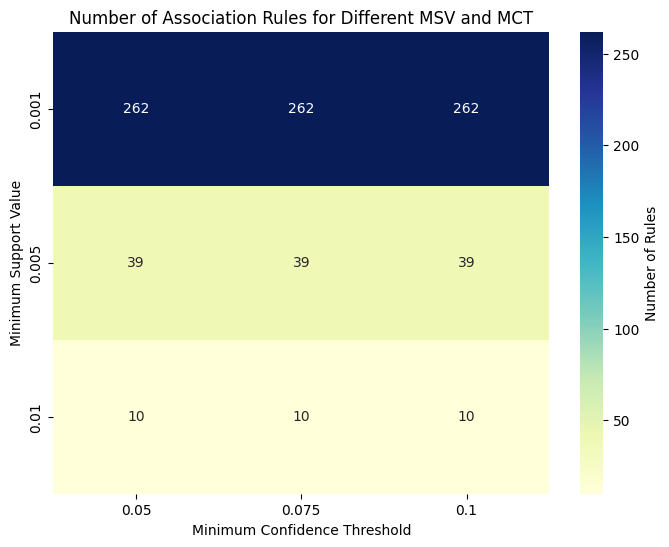

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(te_ary, columns=te.columns_)

# Define minimum support values and minimum confidence thresholds
msv_values = [0.001, 0.005, 0.01]
mct_values = [0.05, 0.075, 0.1]

# Initialize an empty list to store the results
rule_counts = []

# Iterate over each pair of MSV and MCT
for msv in msv_values:
    row = []
    for mct in mct_values:
        # Find frequent itemsets using the current MSV
        frequent_itemsets = apriori(df, min_support=msv, use_colnames=True)
        records = len(frequent_itemsets)
        # Generate association rules with the current MCT
        rules = association_rules(df=frequent_itemsets,
        num_itemsets=records,metric="confidence", min_threshold=0.08)
        
        # Store the number of rules
        row.append(len(rules))
    
    # Append the row of counts for the current MSV
    rule_counts.append(row)

# Convert the results to a DataFrame
heatmap_data = pd.DataFrame(rule_counts, columns=mct_values, index=msv_values)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Number of Rules'})
plt.xlabel('Minimum Confidence Threshold')
plt.ylabel('Minimum Support Value')
plt.title('Number of Association Rules for Different MSV and MCT')
plt.show()

##### Here I am Using Pytorch Implementation , As it is already installed in my laptop with GPU configuration
###### Thank you

##### 2. [Image Classification using CNN] Construct a 4-class classification model using a convolutional neural
###### network with the following simple architecture (2 point)
###### i 1 Convolutional Layer with 8 3 × 3 filters.
###### ii 1 max pooling with 2 × 2 pool size
###### i 1 Convolutional Layer with 4 3 × 3 filters.
###### ii 1 max pooling with 2 × 2 pool size
###### iii Flatten the Tensor
###### iv 1 hidden layer with 8 nodes for fully connected neural network
###### v Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function.
###### (Use ’Relu’ for all layers except the output layer.) for 20 epochs using ‘adam’ optimizer and ‘categorical
###### cross entropy’ loss function. If your machine is too slow, you can reduce to 5 epochs. You can
###### perform more epochs (> 20) if you want to. For validation split, you will use 20%. For batch size,
###### you can pick a size that will not slow down the training process on your machine. (see https:
###### //keras.io/examples/vision/mnist_convnet/)

Using device: cuda
Epoch 1/20, Training Accuracy: 78.58%, Validation Accuracy: 95.09%
Epoch 2/20, Training Accuracy: 96.42%, Validation Accuracy: 96.49%
Epoch 3/20, Training Accuracy: 96.98%, Validation Accuracy: 96.81%
Epoch 4/20, Training Accuracy: 97.18%, Validation Accuracy: 97.03%
Epoch 5/20, Training Accuracy: 97.43%, Validation Accuracy: 97.39%
Epoch 6/20, Training Accuracy: 97.67%, Validation Accuracy: 97.48%
Epoch 7/20, Training Accuracy: 97.75%, Validation Accuracy: 97.56%
Epoch 8/20, Training Accuracy: 97.90%, Validation Accuracy: 96.51%
Epoch 9/20, Training Accuracy: 98.08%, Validation Accuracy: 97.46%
Epoch 10/20, Training Accuracy: 98.14%, Validation Accuracy: 97.09%
Epoch 11/20, Training Accuracy: 98.24%, Validation Accuracy: 98.04%
Epoch 12/20, Training Accuracy: 98.49%, Validation Accuracy: 97.96%
Epoch 13/20, Training Accuracy: 98.54%, Validation Accuracy: 98.12%
Epoch 14/20, Training Accuracy: 98.57%, Validation Accuracy: 98.14%
Epoch 15/20, Training Accuracy: 98.69%

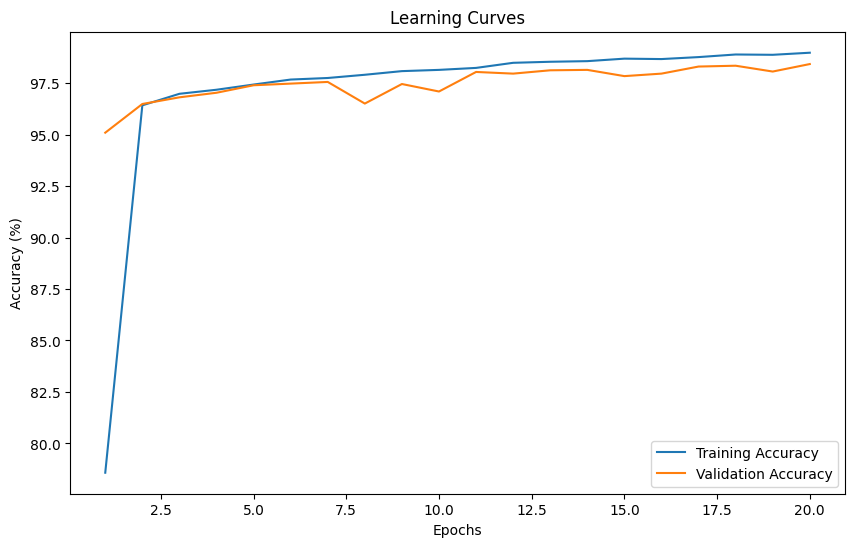

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)  # 1 input channel, 8 filters, 3x3 kernel
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling
        self.conv2 = nn.Conv2d(8, 4, kernel_size=3)  # 8 input channels, 4 filters, 3x3 kernel
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(4 * 5 * 5, 8)  # Fully connected layer, 4x5x5 from flattened tensor
        self.fc2 = nn.Linear(8, 4)  # Fully connected output layer, 4 classes

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x


# Load MNIST dataset and preprocess for 4 classes (digits 0, 1, 2, 3)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Filter dataset to include only classes 0, 1, 2, and 3
subset_indices = [i for i, (img, label) in enumerate(dataset) if label in [0, 1, 2, 3]]
dataset = torch.utils.data.Subset(dataset, subset_indices)

# Split into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleCNN().to(device)  # Move the model to the GPU if available
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 20
train_acc = []
val_acc = []

for epoch in range(epochs):
    model.train()
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU if available

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_acc.append(100 * correct_train / total_train)

    # Validation phase
    model.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU if available
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_acc.append(100 * correct_val / total_val)
    print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_acc[-1]:.2f}%, Validation Accuracy: {val_acc[-1]:.2f}%")

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Learning Curves')
plt.legend()
plt.show()


## My Banner ID: 916502787

##### Modified CNN to add hidden_nodes parameter to run  4,16 

In [38]:


class SimpleCNN(nn.Module):
    def __init__(self, hidden_nodes=8):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)  # 1 input channel, 8 filters, 3x3 kernel
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling
        self.conv2 = nn.Conv2d(8, 4, kernel_size=3)  # 8 input channels, 4 filters, 3x3 kernel
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(4 * 5 * 5, hidden_nodes)  # Fully connected layer with variable hidden nodes
        self.fc2 = nn.Linear(hidden_nodes, 4)  # Fully connected output layer, 4 classes

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x



# Define a function to train the model
def train_model(hidden_nodes, epochs=20):
    model = SimpleCNN(hidden_nodes=hidden_nodes).to(device)  # Move the model to the GPU if available
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_acc = []
    val_acc = []

    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU if available

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_acc.append(100 * correct_train / total_train)

        # Validation phase
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)  # Move data to GPU if available
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_acc.append(100 * correct_val / total_val)
        print(f"Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_acc[-1]:.2f}%, Validation Accuracy: {val_acc[-1]:.2f}%")
    
    return train_acc, val_acc

# Train the model with 4, 8, and 16 hidden nodes
hidden_node_configs = [4,16]
results = {}

for hidden_nodes in hidden_node_configs:
    print(f"\nTraining model with {hidden_nodes} hidden nodes:")
    train_acc, val_acc = train_model(hidden_nodes)
    results[hidden_nodes] = (train_acc, val_acc)




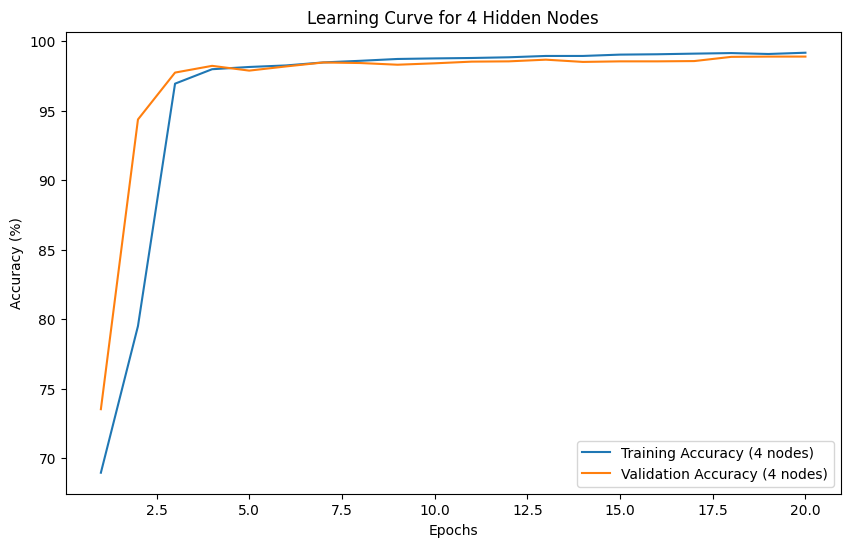

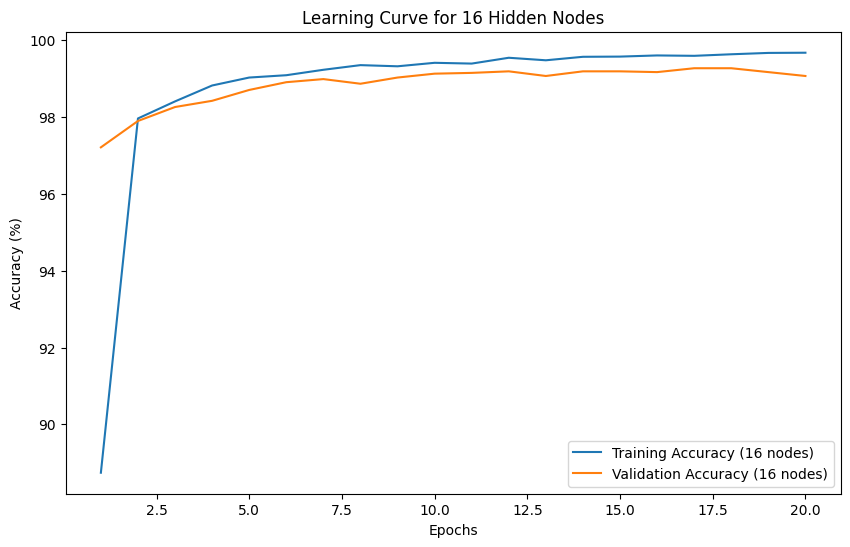

In [37]:
for hidden_nodes, (train_acc, val_acc) in results.items():
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), train_acc, label=f'Training Accuracy ({hidden_nodes} nodes)')
    plt.plot(range(1, 21), val_acc, label=f'Validation Accuracy ({hidden_nodes} nodes)')
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Learning Curve for {hidden_nodes} Hidden Nodes')
    plt.legend()
    plt.show()

Describe and discuss what you observe by comparing the performance of the first model and the
other two models you constructed in (a), (b) or (c) (depending on which one you did). Comment
on whether the models are overfit, underfit, or just right.


Performance of the three models with different hidden node configurations (8, 4, and 16 nodes)

8 hidden nodes:
This model had a pretty solid start, with 78.58% training accuracy and 95.09% validation accuracy. Both kept improving steadily, and by the 20th epoch, it hit 98.97% training accuracy and 98.42% validation accuracy. The validation accuracy was high, and the small gap between the two accuracies shows that the model is well-balanced and generalizes well.  

4 hidden nodes:
At first, this model didn’t perform as well, starting with 68.95% training accuracy and 73.52% validation accuracy. But it improved quickly, ending with 99.17% training accuracy and 98.89% validation accuracy. It’s impressive, but since the training accuracy is slightly higher than the validation accuracy towards the end, it might be overfitting just a little.  

16 hidden nodes:
This model started off strong with 88.74% training accuracy and 97.21% validation accuracy. It kept improving and ended up with the best results—99.68% training accuracy and 99.07% validation accuracy. That said, the training accuracy is really high, and the small gap between training and validation suggests it could be overfitting a bit.  

Conclusion:
The 8 hidden node model seems to be the most balanced, with good results and no obvious overfitting. The 4 hidden node model improved quickly but might be slightly overfitting. The 16 hidden node model had the best accuracy overall but could also be leaning towards overfitting.

In [65]:
import pandas as pd
from datasets import Dataset, DatasetDict

# Step 1: Load your datasets using pandas
train_df = pd.read_json("./student_8/train.json", lines=True)
validation_df = pd.read_json("./student_8/validation.json", lines=True)
test_df = pd.read_json("./student_8/test.json", lines=True)

# Step 2: Convert pandas DataFrames to Hugging Face Dataset objects
train_dataset = Dataset.from_pandas(train_df)
validation_dataset = Dataset.from_pandas(validation_df)
test_dataset = Dataset.from_pandas(test_df)

# Step 3: Create a DatasetDict to organize your datasets
dataset = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset,
    'test': test_dataset
})

# Print the structure of the dataset_dict
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
        num_rows: 3000
    })
    validation: Dataset({
        features: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
        num_rows: 400
    })
    test: Dataset({
        features: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
        num_rows: 1500
    })
})


In [66]:

example = dataset['train'][0]
example

{'ID': '2017-En-31496',
 'Tweet': 'i animated a little thing i might post it tomorrow since itll be a Good Thursday.. nice...',
 'anger': False,
 'anticipation': True,
 'disgust': False,
 'fear': False,
 'joy': True,
 'love': False,
 'optimism': True,
 'pessimism': False,
 'sadness': False,
 'surprise': False,
 'trust': False}

In [115]:
labels = [label for label in dataset['train'].features.keys() if label not in ['ID', 'Tweet']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}
labels

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

In [68]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_data(examples):
  # take a batch of texts
  text = examples["Tweet"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()
  
  return encoding

In [72]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [73]:
# encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)
encoded_dataset.set_format("torch")

In [74]:
from transformers import AutoModelForSequenceClassification

# Define id2label and label2id mappings
id2label = {idx: label for idx, label in enumerate(labels)}
label2id = {label: idx for idx, label in enumerate(labels)}

# Load BERT model for multi-label classification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", 
                                                           problem_type="multi_label_classification", 
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [81]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Training arguments
args = TrainingArguments(
    f"bert-finetuned-sem_eval-english",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
    
)

# Compute metrics function
def multi_label_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    f1_micro_average = f1_score(labels, y_pred, average='micro')
    roc_auc = roc_auc_score(labels, y_pred, average='micro')
    accuracy = accuracy_score(labels, y_pred)
    return {'f1': f1_micro_average, 'roc_auc': roc_auc, 'accuracy': accuracy}

def compute_metrics(p):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    result = multi_label_metrics(predictions=preds, labels=p.label_ids)
    return result

# Trainer object
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


In [82]:
trainer.train()


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,No log,0.320482,0.684211,0.779995,0.260000
2,0.203100,0.336901,0.693703,0.799302,0.255000
3,0.164400,0.331558,0.691317,0.790335,0.257500
4,0.132000,0.343676,0.690039,0.790581,0.242500
5,0.132000,0.345584,0.690265,0.791637,0.242500


TrainOutput(global_step=1875, training_loss=0.15682037353515624, metrics={'train_runtime': 291.9934, 'train_samples_per_second': 51.371, 'train_steps_per_second': 6.421, 'total_flos': 986746187520000.0, 'train_loss': 0.15682037353515624, 'epoch': 5.0})

In [87]:
trainer.evaluate()

{'eval_loss': 0.3369014263153076,
 'eval_f1': 0.6937033084311632,
 'eval_roc_auc': 0.7993022379588347,
 'eval_accuracy': 0.255,
 'eval_runtime': 2.2913,
 'eval_samples_per_second': 174.57,
 'eval_steps_per_second': 21.821,
 'epoch': 5.0}

In [85]:
trainer.state

TrainerState(epoch=5.0, global_step=1875, max_steps=1875, logging_steps=500, eval_steps=500, save_steps=500, train_batch_size=8, num_train_epochs=5, num_input_tokens_seen=0, total_flos=986746187520000.0, log_history=[{'eval_loss': 0.32048216462135315, 'eval_f1': 0.6842105263157895, 'eval_roc_auc': 0.7799948313922878, 'eval_accuracy': 0.26, 'eval_runtime': 1.9814, 'eval_samples_per_second': 201.88, 'eval_steps_per_second': 25.235, 'epoch': 1.0, 'step': 375}, {'loss': 0.2031, 'grad_norm': 1.3370453119277954, 'learning_rate': 1.4666666666666666e-05, 'epoch': 1.3333333333333333, 'step': 500}, {'eval_loss': 0.3369014263153076, 'eval_f1': 0.6937033084311632, 'eval_roc_auc': 0.7993022379588347, 'eval_accuracy': 0.255, 'eval_runtime': 2.0388, 'eval_samples_per_second': 196.198, 'eval_steps_per_second': 24.525, 'epoch': 2.0, 'step': 750}, {'loss': 0.1644, 'grad_norm': 1.4280638694763184, 'learning_rate': 9.333333333333334e-06, 'epoch': 2.6666666666666665, 'step': 1000}, {'eval_loss': 0.33155837

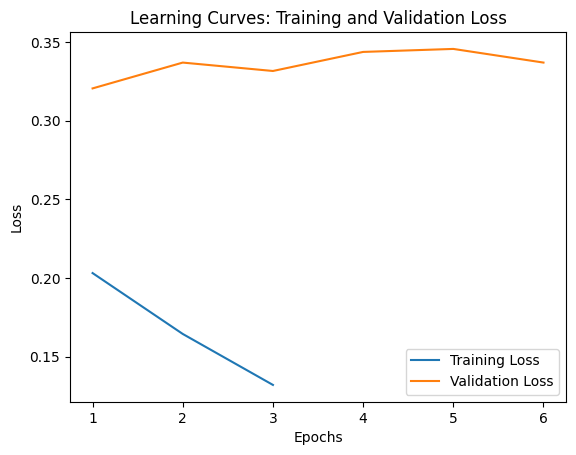

In [88]:
import matplotlib.pyplot as plt

# Extract the training and evaluation loss from the trainer logs
train_losses = []
eval_losses = []

# Iterate through the log history to collect losses
for log in trainer.state.log_history:
    if 'loss' in log:
        train_losses.append(log['loss'])
    if 'eval_loss' in log:
        eval_losses.append(log['eval_loss'])

# Plotting the learning curves
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.plot(range(1, len(eval_losses) + 1), eval_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curves: Training and Validation Loss")
plt.show()



In [90]:
from sklearn.metrics import accuracy_score
import torch
import numpy as np

# Get predictions, labels, and metrics
predictions, label_ids, metrics = trainer.predict(encoded_dataset['test'])

# Convert predictions using a threshold (sigmoid)
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(torch.Tensor(predictions))
y_pred = np.zeros(probs.shape)
y_pred[np.where(probs >= 0.5)] = 1

# Calculate accuracy (all labels must match)
accuracy = accuracy_score(label_ids, y_pred)
print(f"Test Accuracy (all labels must match): {accuracy}")



Test Accuracy (all labels must match): 0.274


In [117]:
labels = np.array(labels)
y_pred.shape,labels.shape,labels

((1500, 11),
 (11,),
 array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love',
        'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
       dtype='<U12'))

In [114]:

labels1 = np.ones((y_pred.shape[0], 11))
# Reshape labels to match y_pred's shape
  # Repeat the labels for each sample

# Calculate accuracy (at least one label matches)
correct_predictions = np.sum(np.any(y_pred == labels1, axis=1))
accuracy_one_label = correct_predictions / y_pred.shape[0]
print(f"Test Accuracy (at least one label matches): {accuracy_one_label}")



Test Accuracy (at least one label matches): 0.968
